In [1]:
import pandas as pd
from xgboost import XGBRegressor
from function import split_data

# 读取数据
data = pd.read_csv("../data/dataset.csv")
X_train, X_test, y_train, y_test = split_data(data)

# 训练XGBoost回归模型
xgb = XGBRegressor(n_estimators=280,
                   learning_rate=0.09,
                   subsample=0.64,
                   gamma=0.3,
                   max_depth=18,
                   min_child_weight=9,
                   reg_alpha=0.5,
                   colsample_bytree=0.8,
                   colsample_bylevel=0.6,
                   colsample_bynode=0.6,
                   random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

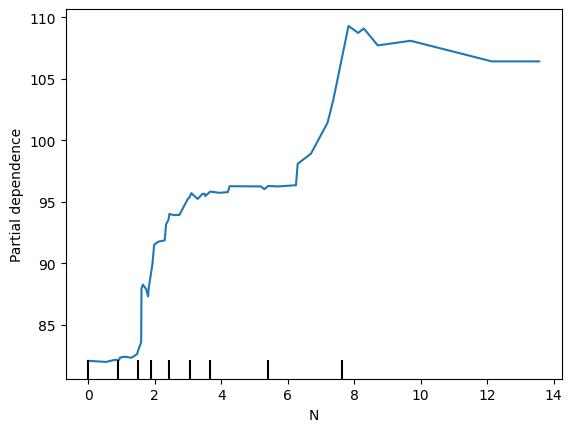

In [3]:
from function import save_pdp

# 指定特征名称和保存路径
feature_name = 'N'
savepath = f'pdp_{feature_name}.csv'

# 保存PDP数据
save_pdp(xgb, X_train, feature_name, savepath)

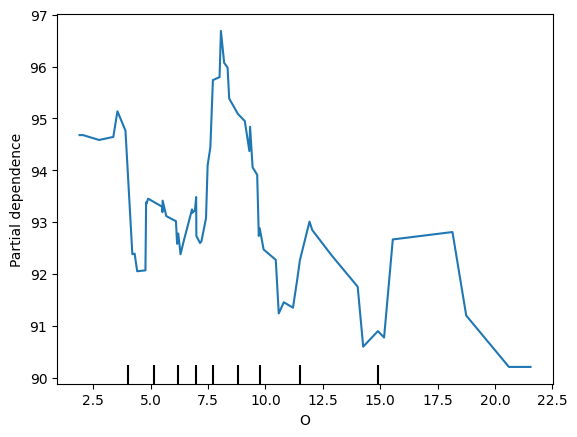

In [4]:
# 指定特征名称和保存路径
feature_name = 'O'
savepath = f'pdp_{feature_name}.csv'

# 保存PDP数据
save_pdp(xgb, X_train, feature_name, savepath)

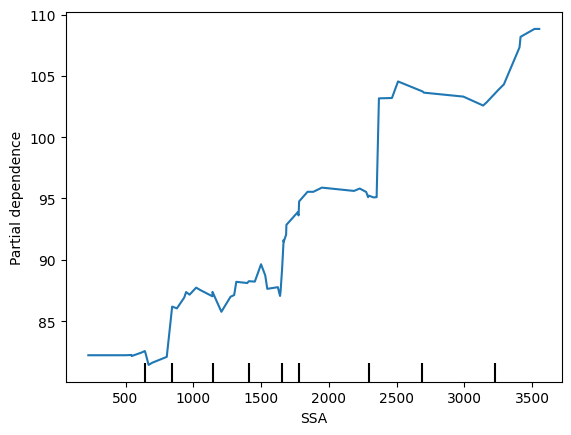

In [5]:
# 指定特征名称和保存路径
feature_name = 'SSA'
savepath = f'pdp_{feature_name}.csv'

# 保存PDP数据
save_pdp(xgb, X_train, feature_name, savepath)

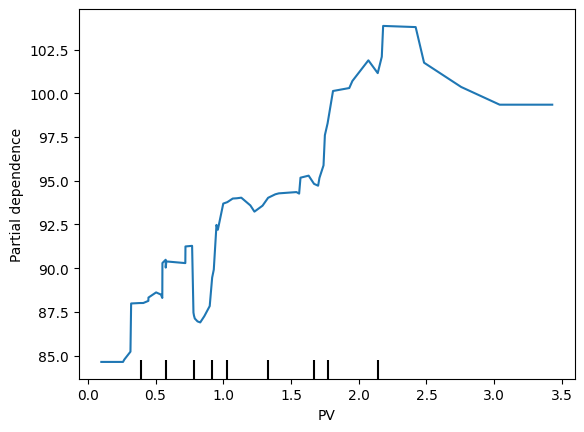

In [6]:
# 指定特征名称和保存路径
feature_name = 'PV'
savepath = f'pdp_{feature_name}.csv'

# 保存PDP数据
save_pdp(xgb, X_train, feature_name, savepath)

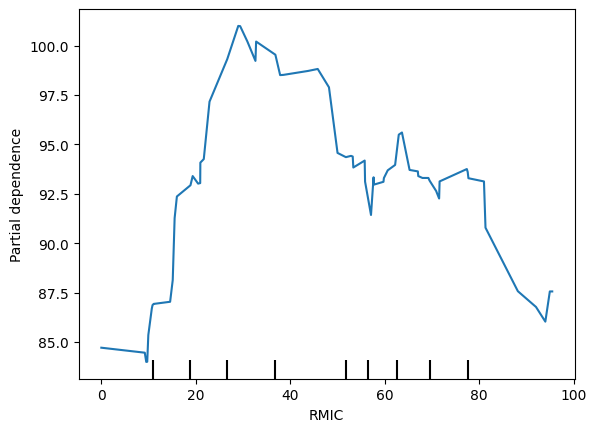

In [7]:
# 指定特征名称和保存路径
feature_name = 'RMIC'
savepath = f'pdp_{feature_name}.csv'

# 保存PDP数据
save_pdp(xgb, X_train, feature_name, savepath)

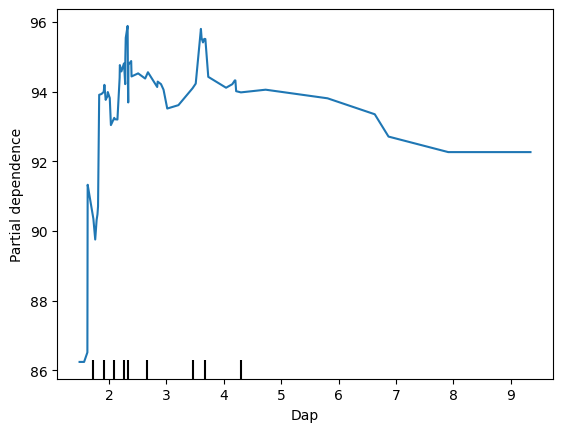

In [8]:
# 指定特征名称和保存路径
feature_name = 'Dap'
savepath = f'pdp_{feature_name}.csv'

# 保存PDP数据
save_pdp(xgb, X_train, feature_name, savepath)

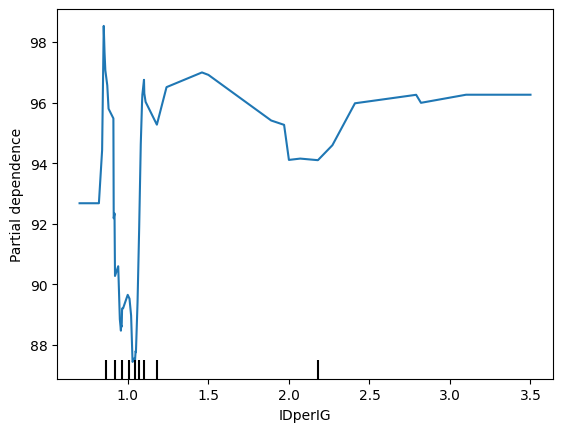

In [9]:
# 指定特征名称和保存路径
feature_name = 'IDperIG'
savepath = f'pdp_{feature_name}.csv'

# 保存PDP数据
save_pdp(xgb, X_train, feature_name, savepath)

IndexError: list index out of range. Please check if the features are correctly specified.


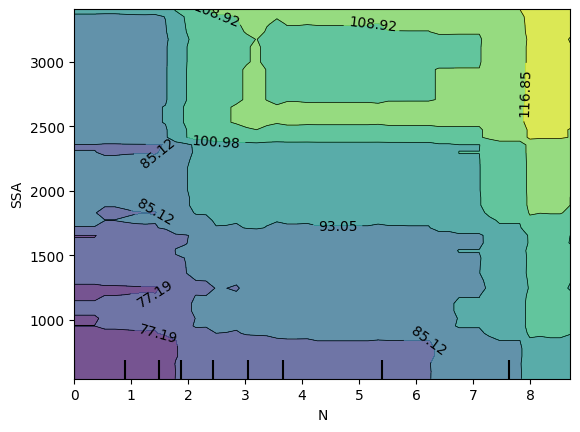

In [7]:
import numpy as np
from sklearn.inspection import PartialDependenceDisplay

# 指定要计算2D部分依赖图的特征
features = [('N', 'SSA')]

# 计算2D部分依赖数据
try:
    pdp_display = PartialDependenceDisplay.from_estimator(xgb, X_train, features, grid_resolution=50)
    
    # 检查是否成功生成部分依赖数据
    if len(pdp_display.pd_results) == 0:
        raise ValueError("No partial dependence data was generated for the given features.")

    # 提取网格值和部分依赖值
    grid_values = pdp_display.pd_results[0].grid_values
    x_values, y_values = grid_values
    average_values = pdp_display.pd_results[0].average

    # 创建网格值
    X_mesh, Y_mesh = np.meshgrid(x_values, y_values)

    # 将数据存储为DataFrame
    pdp_2d_data = pd.DataFrame({
        f'{features[0]}': X_mesh.flatten(),
        f'{features[1]}': Y_mesh.flatten(),
        'Partial Dependence': average_values.flatten()
    })

    # 保存为CSV文件
    pdp_2d_data.to_csv('pdp_2d_result.csv', index=False)
    # 显示保存路径
    print("2D PDP 数据已保存到 pdp_2d_result.csv")

except ValueError as e:
    print(f"Error in generating partial dependence plot: {e}")

except IndexError as e:
    print(f"IndexError: {e}. Please check if the features are correctly specified.")